In [1]:
# Description of Variables 
# The dataset contains 6366 observations of 9 variables: 
# rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good) 
# age: woman's age 
# yrs_married: number of years married 
# children: number of children 
# religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious) 
# educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree) 
# occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 =  "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree) 
# occupation_husb: husband's occupation (same coding as above) 
# affairs: time spent in extra-marital affairs

In [2]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from patsy import dmatrices 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 

In [3]:
# load dataset
dta = sm.datasets.fair.load_pandas().data

# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)

In [4]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [5]:
dta.groupby('affair').std()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,0.821099,6.809684,7.101994,1.417410,0.885117,2.211409,0.930512,1.361392,0.000000
1,1.065286,6.699997,7.185216,1.410401,0.840767,2.086742,0.965927,1.314123,3.437478


In [6]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [7]:
# rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)  --> AVERAGE Marriage Rating by Woman
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


In [8]:
# Age & Years of marriage and Children are correlated with declining of Marriage Rate

Text(0, 0.5, 'Frequency')

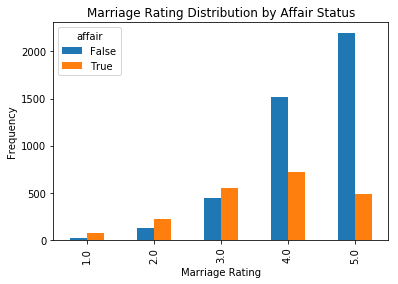

In [9]:
# Marriage rating grouped by affair (True or False)
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

In [10]:
# create dataframes with an intercept column and dummy variables for
# occupation and occupation_husb
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  dta, return_type="dataframe")
X.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

In [11]:
y

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [12]:
X.head()

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6366 entries, 0 to 6365
Data columns (total 17 columns):
Intercept                    6366 non-null float64
C(occupation)[T.2.0]         6366 non-null float64
C(occupation)[T.3.0]         6366 non-null float64
C(occupation)[T.4.0]         6366 non-null float64
C(occupation)[T.5.0]         6366 non-null float64
C(occupation)[T.6.0]         6366 non-null float64
C(occupation_husb)[T.2.0]    6366 non-null float64
C(occupation_husb)[T.3.0]    6366 non-null float64
C(occupation_husb)[T.4.0]    6366 non-null float64
C(occupation_husb)[T.5.0]    6366 non-null float64
C(occupation_husb)[T.6.0]    6366 non-null float64
rate_marriage                6366 non-null float64
age                          6366 non-null float64
yrs_married                  6366 non-null float64
children                     6366 non-null float64
religious                    6366 non-null float64
educ                         6366 non-null float64
dtypes: float64(17)
memory

In [14]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2', 
                        'C(occupation)[T.3.0]':'occ_3', 
                        'C(occupation)[T.4.0]':'occ_4', 
                        'C(occupation)[T.5.0]':'occ_5', 
                        'C(occupation)[T.6.0]':'occ_6', 
                        'C(occupation_husb)[T.2.0]':'occ_husb_2', 
                        'C(occupation_husb)[T.3.0]':'occ_husb_3', 
                        'C(occupation_husb)[T.4.0]':'occ_husb_4', 
                        'C(occupation_husb)[T.5.0]':'occ_husb_5', 
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'}) 
y = np.ravel(y)

In [15]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [16]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7258875274897895

In [17]:
pred_y = model.predict(X)

In [18]:
pred_y

array([0., 1., 0., ..., 0., 0., 0.])

In [19]:
# Coefficient of all the columns 

In [20]:
list(zip(X.columns, np.transpose(model.coef_)))

[('Intercept', array([1.48983589])),
 ('occ_2', array([0.18806639])),
 ('occ_3', array([0.49894787])),
 ('occ_4', array([0.25066856])),
 ('occ_5', array([0.83900806])),
 ('occ_6', array([0.83390843])),
 ('occ_husb_2', array([0.19063594])),
 ('occ_husb_3', array([0.29783271])),
 ('occ_husb_4', array([0.16140885])),
 ('occ_husb_5', array([0.18777091])),
 ('occ_husb_6', array([0.19401637])),
 ('rate_marriage', array([-0.70312336])),
 ('age', array([-0.05841777])),
 ('yrs_married', array([0.10567654])),
 ('children', array([0.01691927])),
 ('religious', array([-0.37113627])),
 ('educ', array([0.0040165]))]

##### Increase in marriage rate and religiousness results in less likehood of having an external affair 

### Model Evaluation

In [21]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
model2 = LogisticRegression(max_iter=500, solver ='lbfgs')
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
X_train.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
2652,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,22.0,0.5,0.0,3.0,16.0
1319,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,27.0,9.0,2.0,1.0,16.0
1948,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,27.0,6.0,1.0,1.0,12.0
2787,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,42.0,23.0,3.0,3.0,17.0
6259,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,42.0,23.0,2.0,3.0,14.0


In [23]:
# predict class labels for the test set
pred_train = model2.predict(X_train)
predicted = model2.predict(X_test)
predicted[:20]

array([0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 0.])

In [24]:
print('Train', metrics.accuracy_score(pred_train, y_train))

Train 0.7293536804308797


In [25]:
print('Test', metrics.accuracy_score(predicted, y_test))

Test 0.7136125654450262


In [26]:
metrics.confusion_matrix(y_test, predicted)

array([[1138,  125],
       [ 422,  225]], dtype=int64)

In [27]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.73      0.90      0.81      1263
         1.0       0.64      0.35      0.45       647

   micro avg       0.71      0.71      0.71      1910
   macro avg       0.69      0.62      0.63      1910
weighted avg       0.70      0.71      0.69      1910



In [28]:
# generate class probabilities
probs = model2.predict_proba(X_test)
probs[:20]  # Probability for Zero and One within Test Data 

array([[0.74652747, 0.25347253],
       [0.70843962, 0.29156038],
       [0.33425518, 0.66574482],
       [0.93759599, 0.06240401],
       [0.36915996, 0.63084004],
       [0.58625213, 0.41374787],
       [0.76613509, 0.23386491],
       [0.22335477, 0.77664523],
       [0.71501477, 0.28498523],
       [0.93484836, 0.06515164],
       [0.43958305, 0.56041695],
       [0.40750508, 0.59249492],
       [0.6286131 , 0.3713869 ],
       [0.47576698, 0.52423302],
       [0.69858367, 0.30141633],
       [0.92759025, 0.07240975],
       [0.4600858 , 0.5399142 ],
       [0.70692795, 0.29307205],
       [0.8700208 , 0.1299792 ],
       [0.70024348, 0.29975652]])

In [29]:
fpr, tpr, thres = metrics.roc_curve(y_test, probs[:,1])

In [30]:
pd.DataFrame({'FalsePositiveRate': fpr, 'TruePositiveRate':tpr, 'Threshold' : thres})

,FalsePositiveRate,TruePositiveRate,Threshold
0,0.000000,0.000000,1.955410
1,0.000000,0.001546,0.955410
2,0.000792,0.001546,0.923295
3,0.000792,0.013910,0.901327
4,0.001584,0.013910,0.893228
5,0.001584,0.030912,0.858158
6,0.002375,0.030912,0.853452
7,0.002375,0.035549,0.850708
8,0.003167,0.035549,0.850447
9,0.003167,0.037094,0.845577


### Model Validation using Cross Validation

In [31]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression( solver='lbfgs', max_iter = 1000),  X, y, scoring='accuracy', cv=10)
scores, scores.mean()

(array([0.72100313, 0.70219436, 0.73981191, 0.70597484, 0.70440252,
        0.73113208, 0.73427673, 0.70440252, 0.75314465, 0.74685535]),
 0.7243198083633998)